In [1]:
from astroquery.simbad import Simbad

In [2]:
import pandas as pd

In [3]:
from astropy.table import Table

In [4]:
sp_gaia = Table.read('~/Max_astro/Slovakia/WUMaCat/data/SP_cross_with_gaia.ecsv', format='ascii.ecsv')

In [29]:
import matplotlib.pyplot as plt

In [30]:
sp_gaia.colnames

['separation_arcsec',
 'SOURCE_ID',
 'random_index',
 'ra',
 'dec',
 'parallax',
 'parallax_error',
 'parallax_over_error',
 'pmra',
 'pmra_error',
 'pmdec',
 'pmdec_error',
 'astrometric_params_solved',
 'pseudocolour',
 'pseudocolour_error',
 'ipd_frac_multi_peak',
 'ipd_frac_odd_win',
 'ruwe',
 'phot_g_mean_flux_over_error',
 'phot_g_mean_mag',
 'phot_bp_mean_flux_over_error',
 'phot_bp_mean_mag',
 'phot_rp_mean_flux_over_error',
 'phot_rp_mean_mag',
 'phot_bp_rp_excess_factor',
 'bp_rp',
 'radial_velocity',
 'radial_velocity_error',
 'rv_nb_transits',
 'rv_expected_sig_to_noise',
 'rv_renormalised_gof',
 'rv_chisq_pvalue',
 'phot_variable_flag',
 'l',
 'b',
 'in_qso_candidates',
 'in_galaxy_candidates',
 'non_single_star',
 'has_xp_continuous',
 'has_xp_sampled',
 'has_rvs',
 'has_epoch_photometry',
 'has_epoch_rv',
 'has_mcmc_gspphot',
 'has_mcmc_msc',
 'in_andromeda_survey',
 'teff_gspphot',
 'logg_gspphot',
 'mh_gspphot',
 'distance_gspphot',
 'ag_gspphot',
 'ebpminrp_gspphot',


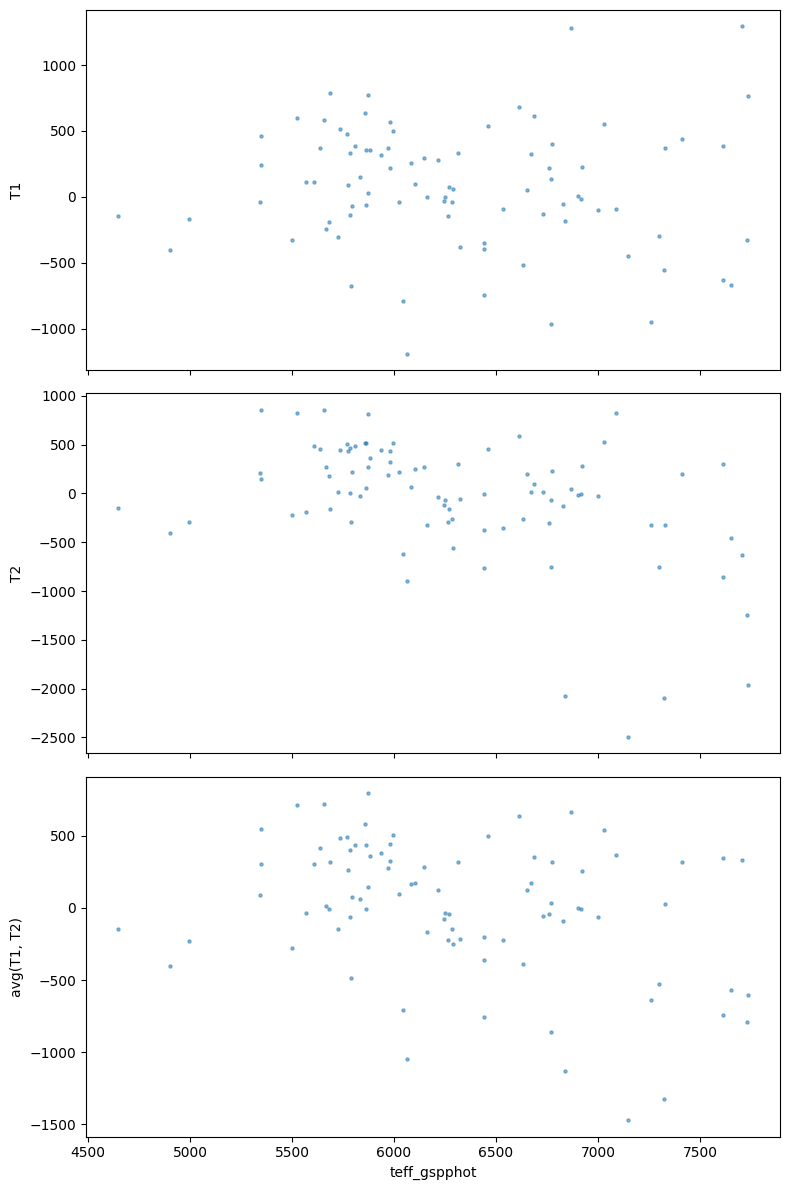

In [33]:
# Create the figure and axes
fig, axes = plt.subplots(3, 1, figsize=(8, 12), sharex=True)  # 3 rows, 1 column

# Plot the data
axes[0].scatter(sp_gaia['teff_gspphot'], sp_gaia['T1']-sp_gaia['teff_gspphot'], s=5, alpha=0.5)
axes[0].set_ylabel('T1')

axes[1].scatter(sp_gaia['teff_gspphot'], sp_gaia['T2']-sp_gaia['teff_gspphot'], s=5, alpha=0.5)
axes[1].set_ylabel('T2')

# Calculate the average of T1 and T2
avg_T = (sp_gaia['T1'] + sp_gaia['T2']) / 2
axes[2].scatter(sp_gaia['teff_gspphot'], avg_T-sp_gaia['teff_gspphot'], s=5, alpha=0.5)
axes[2].set_xlabel('teff_gspphot')
axes[2].set_ylabel('avg(T1, T2)')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [110]:
sp_gaia['name'][115]

IndexError: index 115 is out of bounds for axis 0 with size 115

In [16]:
sp_gaia[['ra', 'dec', 'name']][26]

ra,dec,name
deg,deg,
float64,float64,object
212.36433383101124,-15.58157795095467,CX Vir


In [115]:
# Find duplicate names
name_counts = {}
for row in sp_gaia:
    name = row['name']
    if name in name_counts:
        name_counts[name] += 1
    else:
        name_counts[name] = 1

# Filter rows with duplicate names
duplicate_names = {name for name, count in name_counts.items() if count > 1}
duplicate_rows = sp_gaia[[row['name'] in duplicate_names for row in sp_gaia]]

# Show duplicate rows
duplicate_rows.pprint(max_lines=-1, max_width=-1)

 separation_arcsec       SOURCE_ID      random_index         ra                dec              parallax      parallax_error parallax_over_error         pmra         pmra_error        pmdec        pmdec_error astrometric_params_solved pseudocolour pseudocolour_error ipd_frac_multi_peak ipd_frac_odd_win    ruwe   phot_g_mean_flux_over_error phot_g_mean_mag phot_bp_mean_flux_over_error phot_bp_mean_mag phot_rp_mean_flux_over_error phot_rp_mean_mag phot_bp_rp_excess_factor   bp_rp    radial_velocity radial_velocity_error rv_nb_transits rv_expected_sig_to_noise rv_renormalised_gof rv_chisq_pvalue phot_variable_flag         l                  b          in_qso_candidates in_galaxy_candidates non_single_star has_xp_continuous has_xp_sampled has_rvs has_epoch_photometry has_epoch_rv has_mcmc_gspphot has_mcmc_msc in_andromeda_survey teff_gspphot  logg_gspphot mh_gspphot distance_gspphot ag_gspphot ebpminrp_gspphot my_table_oid       name            Bibcode       Type  ET     P        dPdt    P

In [117]:
sp_gaia.pprint(max_lines=1, max_width=-1)

 separation_arcsec        SOURCE_ID      random_index         ra                dec              parallax      parallax_error parallax_over_error        pmra         pmra_error        pmdec        pmdec_error astrometric_params_solved pseudocolour pseudocolour_error ipd_frac_multi_peak ipd_frac_odd_win    ruwe   phot_g_mean_flux_over_error phot_g_mean_mag phot_bp_mean_flux_over_error phot_bp_mean_mag phot_rp_mean_flux_over_error phot_rp_mean_mag phot_bp_rp_excess_factor   bp_rp   radial_velocity radial_velocity_error rv_nb_transits rv_expected_sig_to_noise rv_renormalised_gof rv_chisq_pvalue phot_variable_flag         l                  b          in_qso_candidates in_galaxy_candidates non_single_star has_xp_continuous has_xp_sampled has_rvs has_epoch_photometry has_epoch_rv has_mcmc_gspphot has_mcmc_msc in_andromeda_survey teff_gspphot  logg_gspphot mh_gspphot distance_gspphot ag_gspphot ebpminrp_gspphot my_table_oid            name                  Bibcode       Type  ET     P       